In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
fname = '/Users/hunfen/OneDrive/General Files/ゼミー/20201030/data/2020-10-28/Bias-Spectroscopy00007.dat'

with open(fname, 'r') as f:
    read_all = f.read()
    offset = read_all.find('[DATA]')
    f.seek(offset)
    f.readline()
    f.readline()
    f.readline()
    f.readline()
    entries = f.readline()
    data = f.read()
entries = entries.strip('\n').split('\t')
data = data.split('\n')
del data[-1]
for i in range(len(data)):
    data[i] = data[i].split('\t')
data = np.array(data) # 转换成np array
data = data.astype(float) # str to float


In [165]:
entries

['Bias calc (V)',
 'Current (A)',
 'LI Demod 1 X (A)',
 'LI Demod 1 Y (A)',
 'Current [bwd] (A)',
 'LI Demod 1 X [bwd] (A)',
 'LI Demod 1 Y [bwd] (A)']

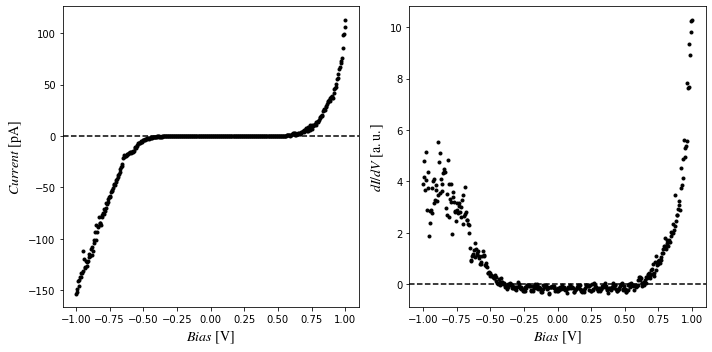

In [3]:
fig, axis = plt.subplots(1, 2, figsize = (10, 5), sharex = True)
for i in range(len(data)):
    axis[0].plot(data[i][0], (data[i][4] + data[i][1]) / 2 * 1e12, '.', color = 'black')
    axis[1].plot(data[i][0], (data[i][2] + data[i][5]) / 2 * 1e12, '.', color = 'black')
axis[0].axhline(y = 0, ls = '--',color = 'black')
axis[1].axhline(y = 0, ls = '--',color = 'black')
axis[0].set_xlabel(r'$Bias\ \mathrm{[V]}$', fontsize = 14)
axis[1].set_xlabel(r'$Bias\ \mathrm{[V]}$', fontsize = 14)
axis[0].set_ylabel(r'$Current\ \mathrm{[pA]}$', fontsize = 14)
axis[1].set_ylabel(r'$dI/dV\ \mathrm{[a.u.]}$', fontsize = 14)
fig.tight_layout();

In [180]:
# fig.savefig('/Users/hunfen/OneDrive/General Files/ゼミー/20201030/spec_1UC_FeSe_1V100pA.jpg', dpi = 600)

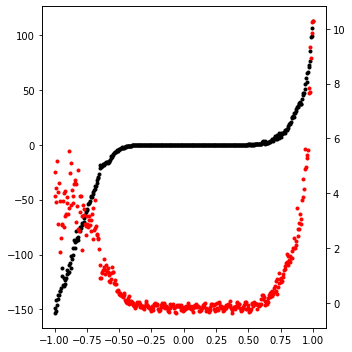

In [7]:
fig, axes = plt.subplots(figsize = (5, 5))
axes_1 = axes.twinx()
for i in range(len(data)):
    # I-V
    axes.plot(data[i][0], (data[i][4] + data[i][1]) / 2 * 1e12, '.', color = 'black')
    axes_1.plot(data[i][0], (data[i][2] + data[i][5]) / 2 * 1e12, '.', color = 'red')
fig.tight_layout();